<center>
<img src="https://habrastorage.org/files/fd4/502/43d/fd450243dd604b81b9713213a247aa20.jpg">
    
## [mlcourse.ai](mlcourse.ai) – Open Machine Learning Course 

<center>Author: [Yury Kashnitskiy](http://yorko.github.io) <br>
Translated and edited by [Sergey Isaev](https://www.linkedin.com/in/isvforall/), [Artem Trunov](https://www.linkedin.com/in/datamove/), [Anastasia Manokhina](https://www.linkedin.com/in/anastasiamanokhina/), and [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/) <br>All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

# <center> Assignment #1 (demo)
## <center>  Exploratory data analysis with Pandas


**In this task you should use Pandas to answer a few questions about the [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) dataset. (You don't have to download the data – it's already here). Choose the answers in the [web-form](https://docs.google.com/forms/d/1uY7MpI2trKx6FLWZte0uVh3ULV4Cm_tDud0VDFGCOKg). This is a demo version of an assignment, so by submitting the form, you'll see a link to the solution .ipynb file.**

Unique values of all features (for more information, please see the links above):
- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- `salary`: >50K,<=50K

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../input/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. How many men and women (*sex* feature) are represented in this dataset?** 

In [3]:
# You code here
data.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

**2. What is the average age (*age* feature) of women?**

In [5]:
# You code here
data[data['sex'] == 'Female']['age'].mean()

36.85823043357163

**3. What is the percentage of German citizens (*native-country* feature)?**

In [9]:
# You code here
data['native-country'].value_counts(normalize=True) *100

United-States                 89.585701
Mexico                         1.974755
?                              1.790486
Philippines                    0.608089
Germany                        0.420749
Canada                         0.371610
Puerto-Rico                    0.350112
El-Salvador                    0.325543
India                          0.307116
Cuba                           0.291760
England                        0.276404
Jamaica                        0.248764
South                          0.245693
China                          0.230337
Italy                          0.224195
Dominican-Republic             0.214981
Vietnam                        0.205768
Guatemala                      0.196554
Japan                          0.190412
Poland                         0.184270
Columbia                       0.181198
Taiwan                         0.156629
Haiti                          0.135131
Iran                           0.132060
Portugal                       0.113633


**4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (*salary* feature) and those who earn less than 50K per year? **

In [17]:
# You code here
data['50k+'] = data['salary'].map({'<=50K': False, '>50K': True})
data[data['50k+']==False].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,24720.000000,2.472000e+04,24720.000000,24720.000000,24720.000000,24720.000000
mean,36.783738,1.903409e+05,9.595065,148.752468,53.142921,38.840210
std,14.020088,1.064823e+05,2.436147,963.139307,310.755769,12.318995
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,25.000000,1.176060e+05,9.000000,0.000000,0.000000,35.000000
50%,34.000000,1.794650e+05,9.000000,0.000000,0.000000,40.000000
75%,46.000000,2.390230e+05,10.000000,0.000000,0.000000,40.000000
max,90.000000,1.484705e+06,16.000000,41310.000000,4356.000000,99.000000


**6. Is it true that people who earn more than 50K have at least high school education? (*education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* or *Doctorate* feature)**

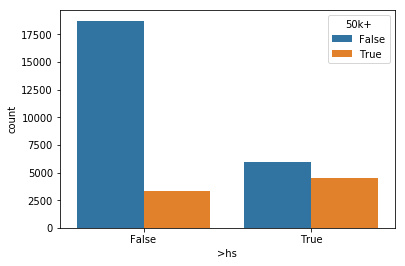

In [27]:
# You code here
import matplotlib.pyplot as plt
import seaborn as sns
# pd.crosstab(data['50k+'], data['education'])
data['>hs'] = data['education'].apply(lambda x : True if x in ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate'] else False)
sns.countplot(x='>hs', hue='50k+', data=data.sort_values('education'))

**7. Display age statistics for each race (*race* feature) and each gender (*sex* feature). Use *groupby()* and *describe()*. Find the maximum age of men of *Amer-Indian-Eskimo* race.**

In [30]:
# You code here
data.groupby(['race'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
Amer-Indian-Eskimo,311.0,37.173633,12.447130,17.0,28.0,35.0,45.5,82.0
Asian-Pac-Islander,1039.0,37.746872,12.825133,17.0,28.0,36.0,45.0,90.0
Black,3124.0,37.767926,12.759290,17.0,28.0,36.0,46.0,90.0
Other,271.0,33.457565,11.538865,17.0,25.0,31.0,41.0,77.0
White,27816.0,38.769881,13.782306,17.0,28.0,37.0,48.0,90.0


**8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (*marital-status* feature)? Consider as married those who have a *marital-status* starting with *Married* (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.**

In [34]:
# You code here
data['married'] = data['marital-status'].apply(lambda x : True if x in ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'] else False)
men = data[data['sex'] == 'Male']
pd.crosstab(men['married'], men['50k+'])

50k+,False,True
married,,
False,7552,697
True,7576,5965


**9. What is the maximum number of hours a person works per week (*hours-per-week* feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?**

In [38]:
# You code here
data[data['hours-per-week'] == 99]['50k+'].value_counts(normalize=True)

False    0.705882
True     0.294118
Name: 50k+, dtype: float64

**10. Count the average time of work (*hours-per-week*) for those who earn a little and a lot (*salary*) for each country (*native-country*). What will these be for Japan?**

In [42]:
# You code here
japan = data[data['native-country']=='Japan']
japan.groupby('50k+')['hours-per-week'].mean()

50k+
False    41.000000
True     47.958333
Name: hours-per-week, dtype: float64